# Метод градиентного спуска

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Простая линейная регрессия

### Данные и постановка задачи

In [2]:
# возьмем уже известные нам данные роста и обхвата шеи
X = np.array([1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78])
y = np.array([29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5])

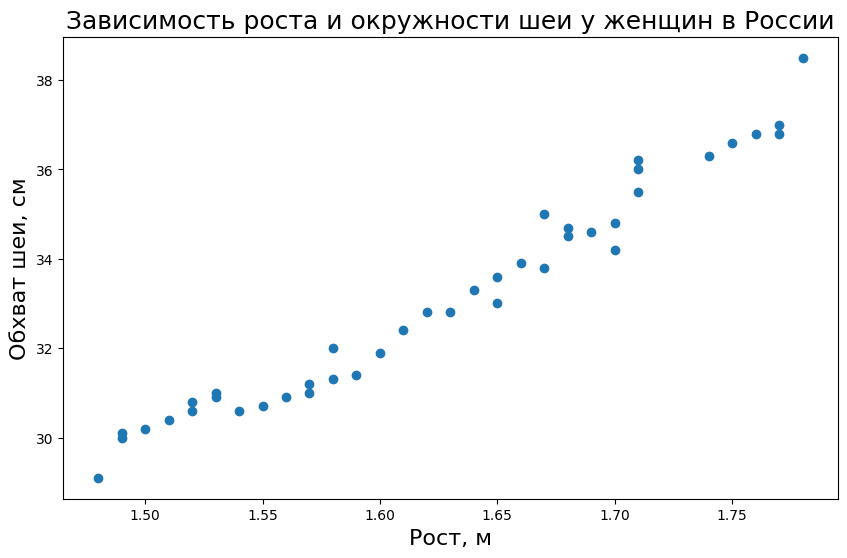

In [3]:
# построим точечную диаграмму
plt.figure(figsize = (10,6))
plt.scatter(X, y)

# добавим подписи
plt.xlabel('Рост, м', fontsize = 16)
plt.ylabel('Обхват шеи, см', fontsize = 16)
plt.title('Зависимость роста и окружности шеи у женщин в России', fontsize = 18)

plt.show()

### Метод наименьших квадратов

#### Модель с аналитическим решением

Спросить МД

In [4]:
X_matr = X.reshape(-1, 1)
w = (np.linalg.inv(X_matr.T @ X_matr) @ X_matr.T @ y)[0]
w_0 = np.mean(y) - w * np.mean(X)

print(w, w_0)

20.379104713785505 -0.03100293221810091


In [5]:
X.shape, y.shape

((41,), (41,))

In [6]:
w_nomin = np.mean(X*y) - np.mean(X)*np.mean(y)
w_denom = np.mean(X*X) - np.mean(X)**2
w = w_nomin / w_denom

w_0 = np.mean(y) - w * np.mean(X)

print(w, w_0)

26.861812005571068 -10.570936299789452


In [7]:
mean_x = np.mean(X)
mean_y = np.mean(y)

numer = 0
denom = 0
for i in range(len(X)):
  numer += (X[i] - mean_x) * (y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2

w = numer / denom
w_0 = mean_y - w * mean_x

print(w, w_0)

26.861812005569753 -10.570936299787313


In [8]:
w = np.dot((X - mean_x), (y - mean_y)) / np.sum((X - mean_x) **2)
w_0 = mean_y - w * mean_x
w, w_0

(26.861812005569757, -10.57093629978732)

#### Модель LinearRegression

In [9]:
lr = LinearRegression()
lr.fit(X_matr, y)
lr.coef_, lr.intercept_

(array([26.86181201]), -10.570936299787334)

In [10]:
# сделаем прогноз
y_pred = lr.predict([[X[0]]])
y_pred, y[0]

(array([29.18454547]), 29.1)

In [11]:
y_pred = lr.predict(X_matr)
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred)

(0.39388820115000184, 0.2273395626677337)

### Метод градиентного спуска

#### Исходная функция (линейная регрессия)

In [12]:
def regression(X, w, b):
    return w * X + b;

#### Функция потерь (half MSE)

In [13]:
def objective(X, y, w, b, n):
   return np.sum((y - regression(X, w, b)) ** 2) / (2 * n)

#### Частные производные (градиент) функции потерь

In [14]:
def partial_w(X, y, w, w_0, n):
   return np.sum(-X * (y - (w * X + w_0))) / n

def partial_w_0(X, y, w, w_0, n):
   return np.sum(-(y - (w * X + w_0))) / n

#### Алгоритм градиентного спуска

In [15]:
# передадим функции данные, количество итераций и скорость обучения
def gradient_descent(X, y, iter, learning_rate):

  # зададим изначальные веса
  w, w_0 = 0, 0
  # и количество наблюдений
  n = len(X)

  w_list, w_0_list, l_list = [], [], []
  for i in range(iter):
      w_list.append(w)
      w_0_list.append(w_0)
      l_list.append(objective(X, y, w, w_0, n))

      w = w - learning_rate * partial_w(X, y, w, w_0, n)
      w_0 = w_0 - learning_rate * partial_w_0(X, y, w, w_0, n)

  # выведем списки с уровнями ошибки и весами
  return w_list, w_0_list, l_list

#### Обучение модели

In [16]:
# распакуем результат работы функции в три переменные
w_list, w_0_list, l_list = gradient_descent(X, y, iter = 200000, learning_rate = 0.01)

# и выведем последние достигнутые значения уровня ошибки и весов
print(w_list[-1], w_0_list[-1], l_list[-1])

26.698433428732226 -10.304740986226612 0.1137737151922353


#### Прогноз

In [17]:
# сделаем прогноз, используя наиболее оптимальные веса
y_pred_gd = regression(X, w_list[-1], w_0_list[-1])
y_pred_gd[:5]

array([29.20894049, 29.47592482, 29.47592482, 29.74290916, 30.00989349])

#### Графики

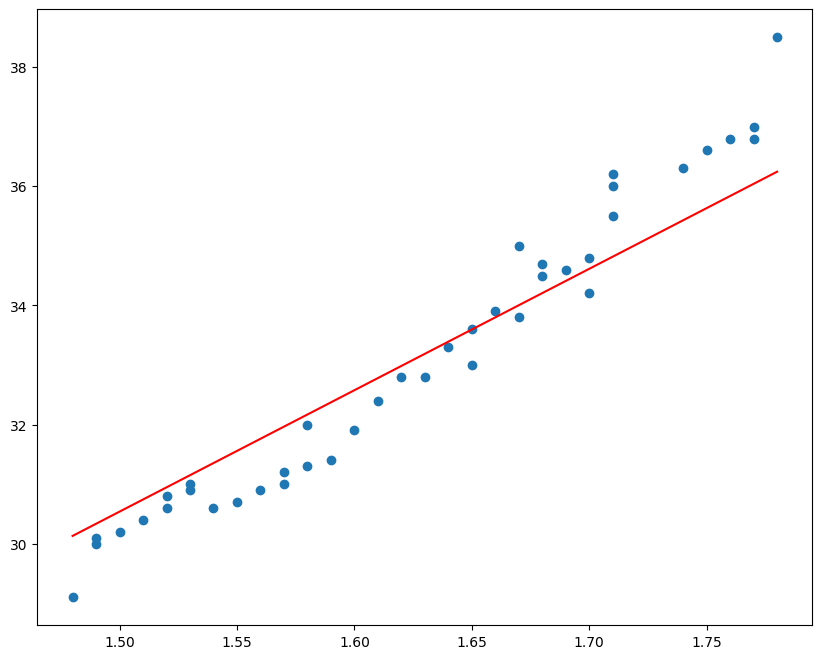

In [18]:
# выведем прямую регрессии
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
y_pred = regression(X, 20.37910471, -0.0310)
#plt.plot(X, y_pred_gd, 'r')
plt.plot(X, y_pred, 'r')
plt.show()

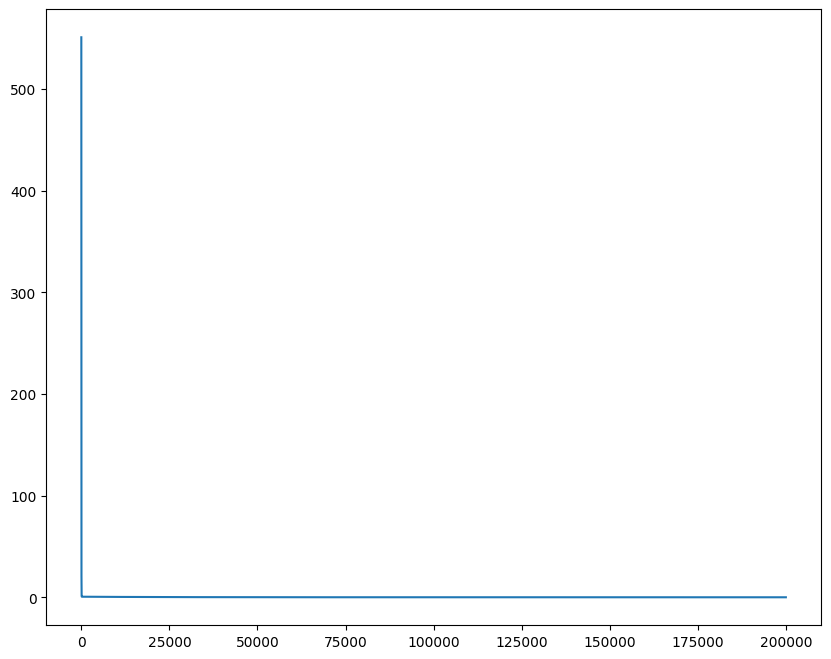

In [19]:
# посмотрим на уровень ошибки
plt.figure(figsize=(10, 8))
plt.plot(l_list)
plt.show()

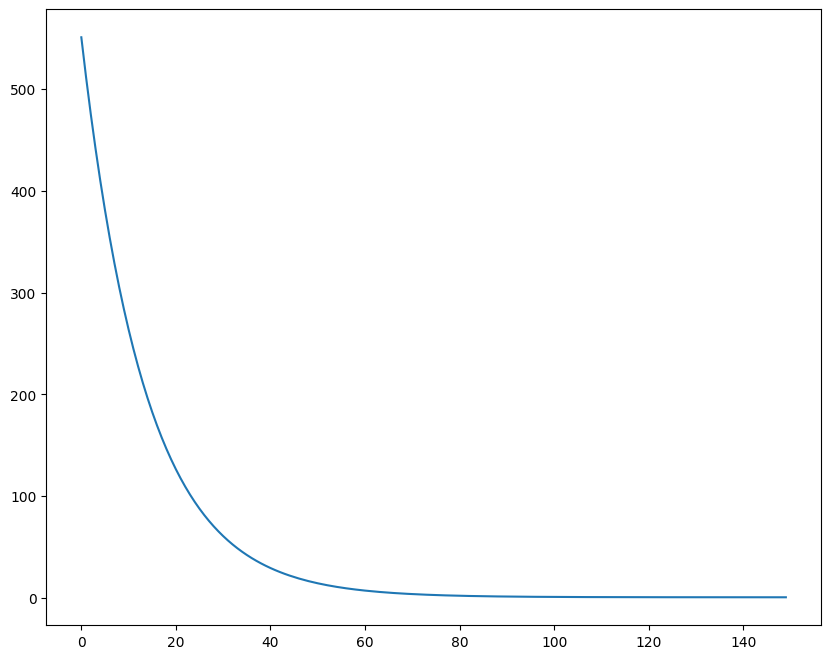

In [20]:
# отбросим первые 150 наблюдений
plt.figure(figsize=(10, 8))
plt.plot(l_list[:150])
plt.show()

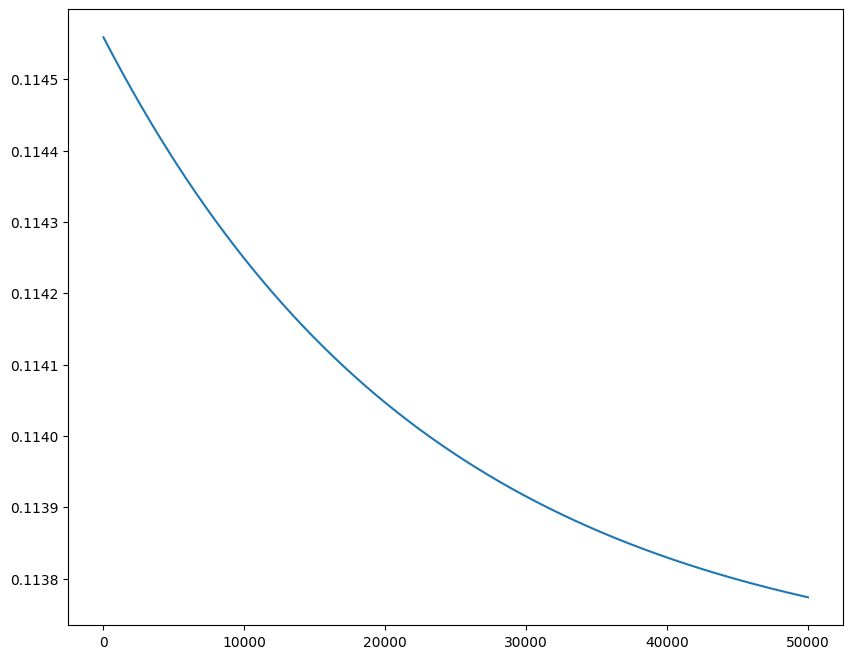

In [21]:
# отбросим первые 150 000 наблюдений
plt.figure(figsize=(10, 8))
plt.plot(l_list[150000:])
plt.show()

#### Оценка качества модели

In [22]:
# рассчитаем MSE
mean_squared_error(y_pred_gd, y)

0.2275474303844706

#### Визуализация шагов алгоритма оптимизации

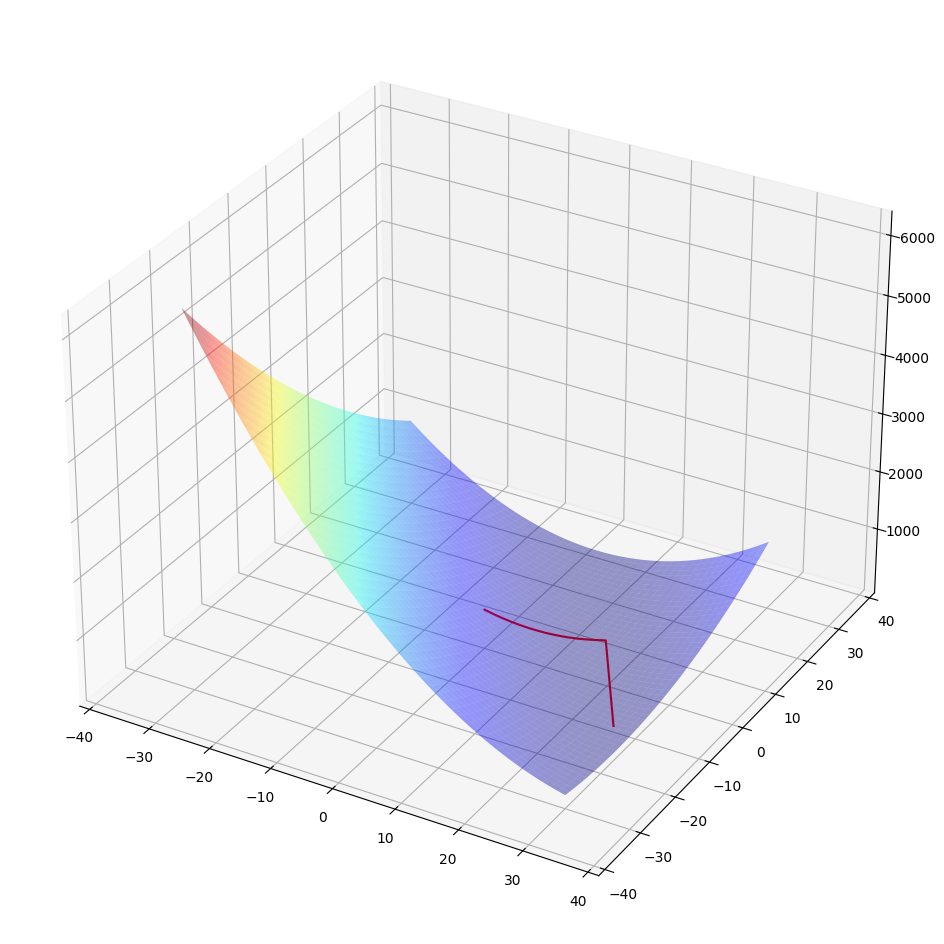

In [23]:
# создадим последовательности из 500 значений
ww = np.linspace(-30, 30, 500)
bb = np.linspace(-30, 30, 500)

# сформируем координатную плоскость
www, bbb = np.meshgrid(ww, bb)

# а также матрицу из нулей для заполнения значениями функции J(w, b)
JJ = np.zeros([len(ww), len(bb)])

# для каждой комбинации w и b
for i in range(len(ww)):
    for j in range(len(bb)):

        # рассчитаем соответствующее прогнозное значение
        yy = www[i, j] * X + bbb[i, j]

        # и подставим его в функцию потерь (матрицу JJ)
        JJ[i, j] = 1 / (2 * len(X)) * np.sum((y - yy) ** 2)

# зададим размер графика
fig = plt.figure(figsize = (14,12))

# создидим трехмерное пространство
ax = fig.add_subplot(projection = '3d')

# построим функцию потерь
ax.plot_surface(www, bbb, JJ, alpha = 0.4, cmap = plt.cm.jet)

# а также путь алгоритма оптимизации
ax.plot(w_list, w_0_list, l_list, c = 'red')

# для наглядности зададим более широкие, чем график
# границы пространства
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)

plt.show()

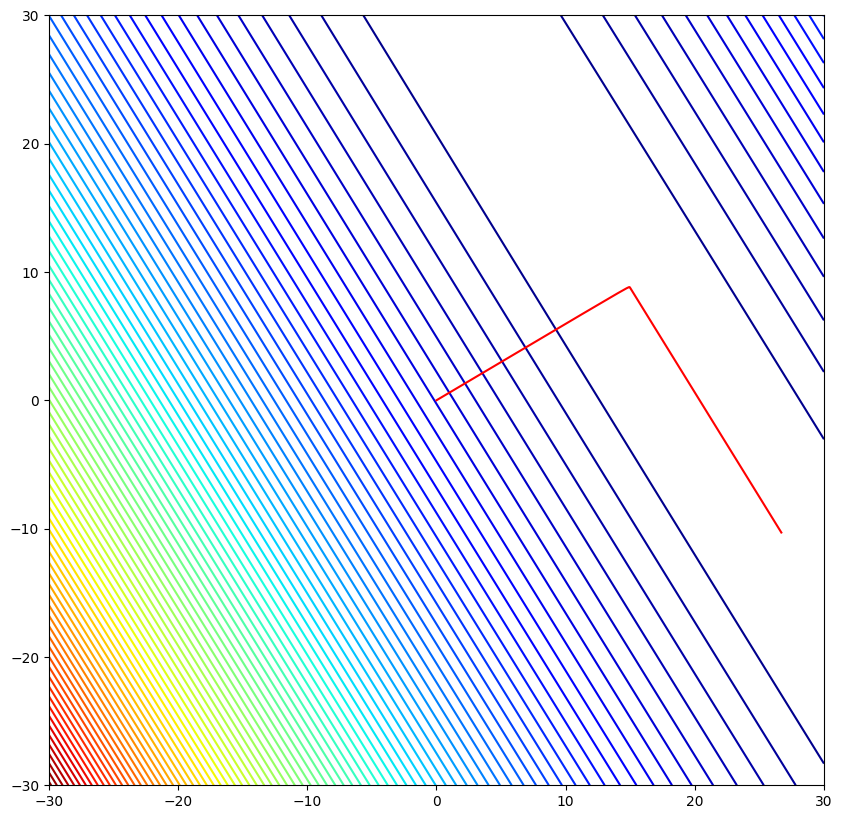

In [24]:
# мы также можем построить график изолиний
fig, ax = plt.subplots(figsize = (10, 10))
ax.contour(www, bbb, JJ, 100, cmap = plt.cm.jet)
ax.plot(w_list, w_0_list, c = 'red')
plt.show()

#### Про выбор гиперпараметров модели

In [25]:
# попробуем тот же размер шага, но уменьшим количество итераций
w_list_t1, b_list_t1, l_list_t1 = gradient_descent(X, y, iter = 10000, learning_rate = 0.01)
w_list_t1[-1], b_list_t1[-1], l_list_t1[-1]

(17.21629175217862, 5.144663248254107, 0.47592791660468253)

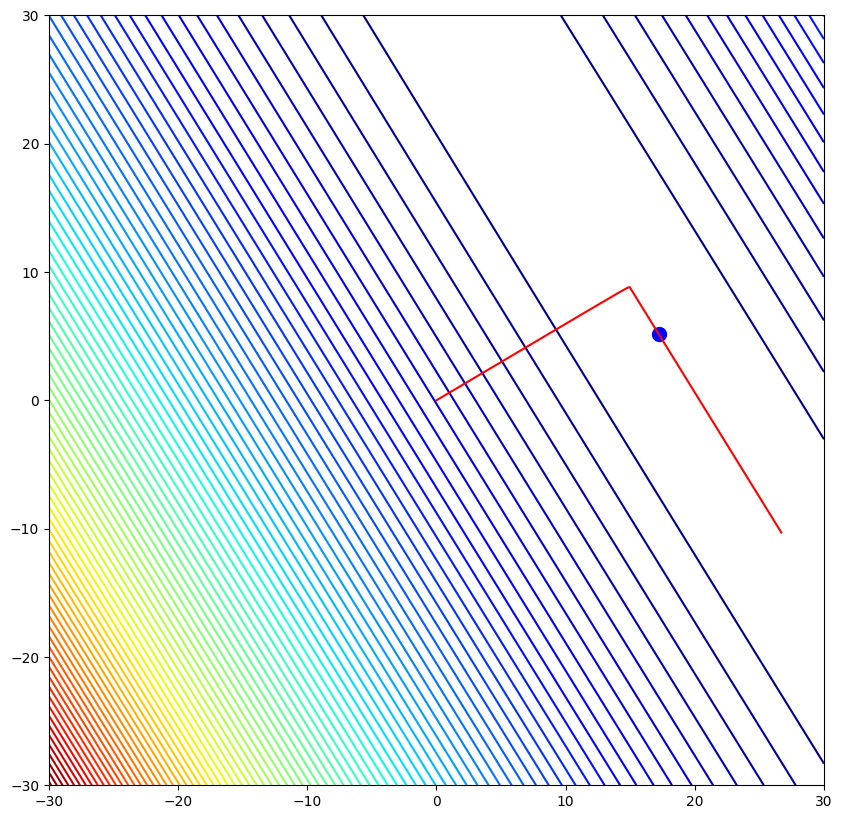

In [26]:
# посмотрим, как мы продвинулись
fig, ax = plt.subplots(figsize = (10, 10))
ax.contour(www, bbb, JJ, 100, cmap = plt.cm.jet)
ax.plot(w_list, w_0_list, c = 'red')
ax.scatter(w_list_t1[-1], b_list_t1[-1], s = 100, c = 'blue')
plt.show()

In [27]:
# теперь вернем на место итерации, но уменьшим шаг
w_list_t2, b_list_t2, l_list_t2 = gradient_descent(X, y, iter = 200000, learning_rate = 0.0001)
w_list_t2[-1], b_list_t2[-1], l_list_t2[-1]

(15.303512613477292, 8.26129422225463, 0.6338554411371837)

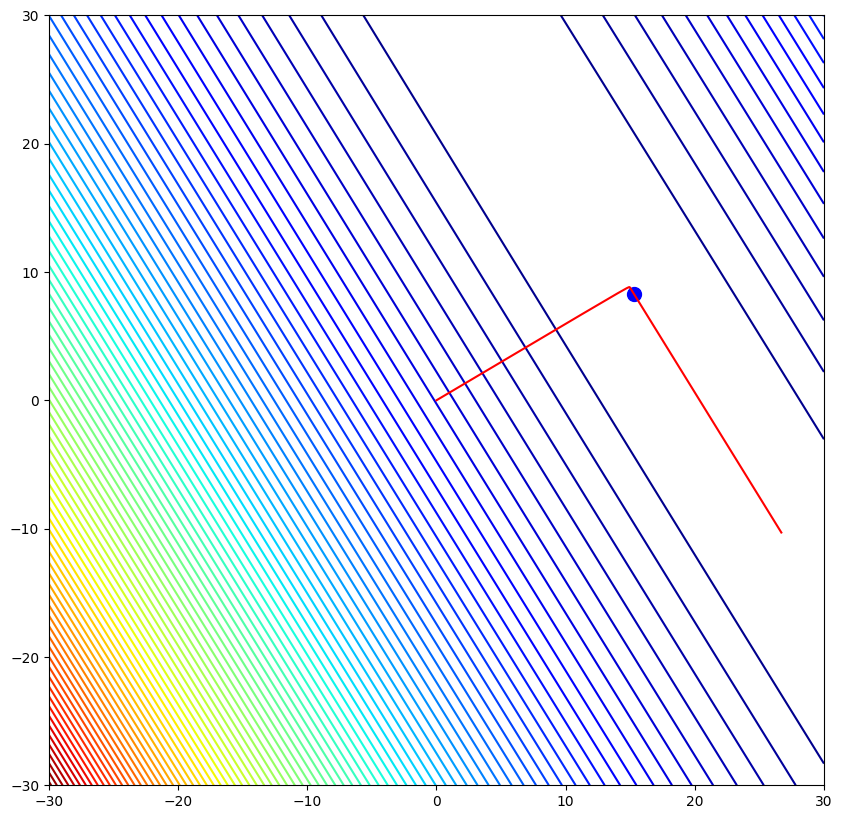

In [28]:
# посмотрим, как мы продвинулись
fig, ax = plt.subplots(figsize = (10, 10))
ax.contour(www, bbb, JJ, 100, cmap = plt.cm.jet)
ax.plot(w_list, w_0_list, c = 'red')
ax.scatter(w_list_t2[-1], b_list_t2[-1], s = 100, c = 'blue')
plt.show()